In [1]:
!pip install seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.6 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.3 MB/s eta 0:00:00:00:01


In [6]:
import pandas as pd
import rdflib as rdflib
import smartpynector as sp

In [7]:
# reading triples from GraphDB
READ_URL = "https://graphdb.odissei.nl/repositories/MateuszTest"
WRITE_URL = "https://graphdb.odissei.nl/repositories/MateuszTest/statements"

triples =sp.read_triples_from_graphdb(
    read_url=READ_URL,
    write_url=WRITE_URL,
)

# for triple in triples:
#     print(triple)

In [17]:
query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX saref: <https://w3id.org/saref#>

    SELECT *
    WHERE {
        ?meas rdf:type saref:Measurement .
        ?meas saref:hasValue ?temp .
        ?meas saref:isMeasuredIn saref:TemperatureUnit .
        ?meas saref:hasTimestamp ?timestamp .
        ?meas saref:isMeasurementOf ?room_id .
        ?meas saref:relatesToProperty saref:Temperature .
        ?meas saref:measurementMadeBy ?device_id .
    }
"""

results = sp.run_sparql_query(READ_URL, query, return_format="json")
df = sp.sparql_results_to_df(results)
df['temp']=df['temp'].astype('int')

df

,meas,temp,timestamp,room_id,device_id
0,http://0.0.0.0:8001/thermostat/measurements/2c...,77,2023-06-18T19:49:38+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
1,http://0.0.0.0:8001/thermostat/measurements/0f...,81,2023-06-18T19:49:44+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
2,http://0.0.0.0:8001/thermostat/measurements/15...,81,2023-06-18T19:49:50+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
3,http://0.0.0.0:8001/thermostat/measurements/b4...,80,2023-06-18T19:49:56+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
4,http://0.0.0.0:8001/thermostat/measurements/10...,82,2023-06-18T19:50:02+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
5,http://0.0.0.0:8001/thermostat/measurements/5c...,83,2023-06-18T19:50:08+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
6,http://0.0.0.0:8001/thermostat/measurements/5b...,81,2023-06-18T19:50:14+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
7,http://0.0.0.0:8001/thermostat/measurements/73...,82,2023-06-18T19:50:20+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
8,http://0.0.0.0:8001/thermostat/measurements/ad...,79,2023-06-18T19:50:26+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1
9,http://0.0.0.0:8001/thermostat/measurements/cf...,77,2023-06-18T19:50:32+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1


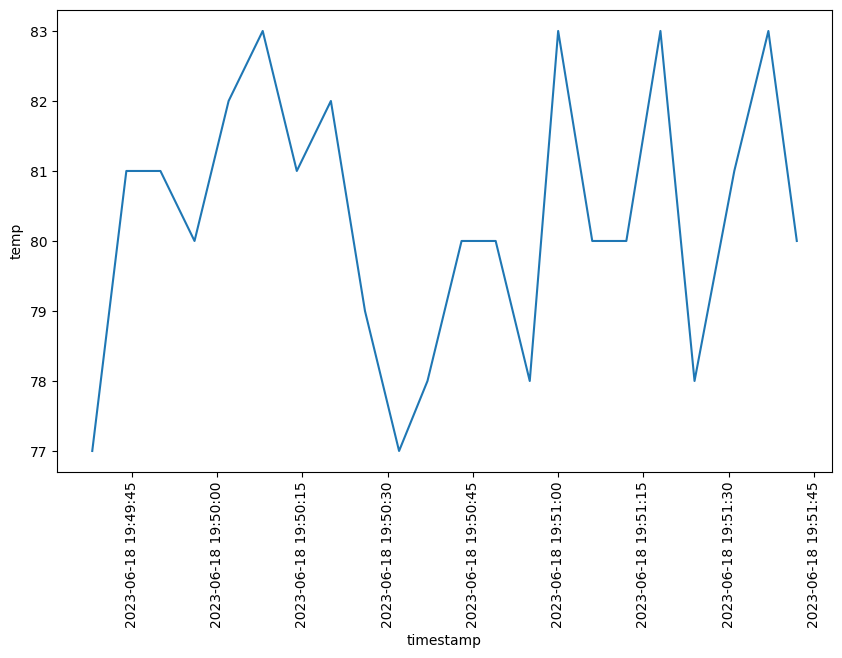

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# assuming `df` is the DataFrame containing the SPARQL query results
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="timestamp", y="temp")
plt.xticks(rotation=90)
# plt.gca().invert_yaxis()

date_format = DateFormatter("%Y-%m-%d %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

# Convert the SPARQL query results into an rdflib.Graph object
g = sp.convert_sparql_results_to_graph(results)

# Convert the rdflib.Graph object into a NetworkX graph
G = rdflib_to_networkx_multidigraph(g)

In [ ]:
# Plot the NetworkX graph using Matplotlib
pos = nx.spring_layout(G, scale=1)
edge_labels = nx.get_edge_attributes(G, "r")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

plt.figure(figsize=(50, 50))
plt.show()